In [1]:

import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

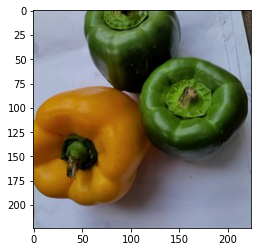

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/kaggle/input/vegetable-images/Vegetable Images/test/Capsicum/1106.jpg', 'r')


imshow(np.asarray(pil_im))

In [3]:

from tensorflow.keras import backend as K
from time import time

# DATA SOURCE --------------------------------------------------

train_data_dir = '/kaggle/input/vegetable-images/Vegetable Images/train'
validation_data_dir = '/kaggle/input/vegetable-images/Vegetable Images/validation'
test_data_dir = '/kaggle/input/vegetable-images/Vegetable Images/test'
image_size = (250, 250)
batch_size = 32

In [4]:
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    #validation_split=0.2,
    #subset="training",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
validation_ds = validation_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

Found 7000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


# **Image Augmentation**

In [5]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        rotation_range=15,
#        zoom_range=0.1
#)

#validation_datagen = ImageDataGenerator(
#        rescale=1./255
#)


#train_ds_augmentation = train_datagen.flow_from_directory(
#    train_data_dir,
#    #validation_split=0.2,
#    #subset="training",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)

#validation_ds_augmentation = validation_datagen.flow_from_directory(
#    validation_data_dir,
#    #validation_split=0.2,
#    #subset="validation",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)



# **The Model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling                    

# MODEL --------------------------------------------------

model = Sequential()
model.add(Rescaling(scale=(1./127.5),offset=-1, input_shape=(250, 250, 3)))

#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#Capas convolucionales.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #Capa de Dropout para prevenir el sobreajuste

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) #Capa de Dropout para prevenir el sobreajuste

#Capa de aplanado para convertir la salida en un vector unidimensional
model.add(Flatten())

#Capa fully connected (completamente conectada) con activación ReLU y Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) #Capa de Dropout para prevenir el sobreajuste

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       7

In [7]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [8]:
# TRAINING --------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping
import time
start_time = time.time()

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTiempo total de entrenamiento: {round((elapsed_time / 60),1)} minutos")

Epoch 1/200
219/219 [==============================] - 27s 78ms/step - loss: 1.5195 - accuracy: 0.4873 - val_loss: 0.8395 - val_accuracy: 0.7425
Epoch 2/200
219/219 [==============================] - 16s 70ms/step - loss: 0.6591 - accuracy: 0.7864 - val_loss: 0.3905 - val_accuracy: 0.8730
Epoch 3/200
219/219 [==============================] - 16s 71ms/step - loss: 0.4297 - accuracy: 0.8610 - val_loss: 0.2436 - val_accuracy: 0.9265
Epoch 4/200
219/219 [==============================] - 16s 70ms/step - loss: 0.2697 - accuracy: 0.9137 - val_loss: 0.2347 - val_accuracy: 0.9250
Epoch 5/200
219/219 [==============================] - 16s 72ms/step - loss: 0.2420 - accuracy: 0.9217 - val_loss: 0.1966 - val_accuracy: 0.9460
Epoch 6/200
219/219 [==============================] - 16s 72ms/step - loss: 0.1733 - accuracy: 0.9449 - val_loss: 0.1393 - val_accuracy: 0.9625
Epoch 7/200
219/219 [==============================] - 16s 74ms/step - loss: 0.1457 - accuracy: 0.9516 - val_loss: 0.1810 - val_ac

In [9]:
# SAVING --------------------------------------------------

model.save("mimodelo.h5")

#  **Evaluación de resultados**

#################################

Explicacion de las metricas usadas:
1.- Precision: proporción de instancias clasificadas como positivas que son realmente positivas
2.- Recall: proporción de instancias positivas que fueron correctamente identificadas por el modelo
3.- F1-score: media armónica de la precisión y el recall
4.- Support: número de instancias reales en cada clase en el conjunto de prueba
5,- Accuracy: proporción de instancias clasificadas correctamente, independientemente de la clase
6.- Macro AVG: promedio no ponderado de las métricas (precision, recall, F1-score) para todas las clases
7.- Weighted AVG: promedio ponderado de las métricas para todas las clases, donde cada clase se pondera según su soporte (número de instancias)

#################################
              precision    recall  f1-score   support

           0     0.9652    0.9700    0.9676       200
           1     0.9751    0.9800    0.9776       200
           2     0.9900    0.9950    0.9925       2

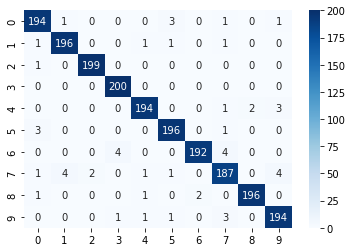

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


print("#################################")
print("")
print("Explicacion de las metricas usadas:")
print("1.- Precision: proporción de instancias clasificadas como positivas que son realmente positivas")
print("2.- Recall: proporción de instancias positivas que fueron correctamente identificadas por el modelo")
print("3.- F1-score: media armónica de la precisión y el recall")
print("4.- Support: número de instancias reales en cada clase en el conjunto de prueba")
print("5,- Accuracy: proporción de instancias clasificadas correctamente, independientemente de la clase")
print("6.- Macro AVG: promedio no ponderado de las métricas (precision, recall, F1-score) para todas las clases")
print("7.- Weighted AVG: promedio ponderado de las métricas para todas las clases, donde cada clase se pondera según su soporte (número de instancias)")
print("")
print("#################################")

results = np.concatenate([(y, model.predict(x=x)) for x, y in validation_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

#disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
#disp.plot()

print(classification_report(labels, predictions, digits = 4))

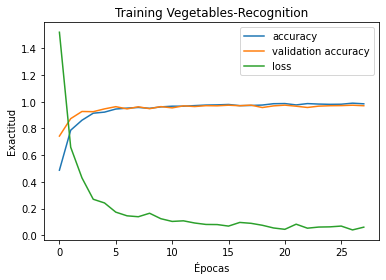

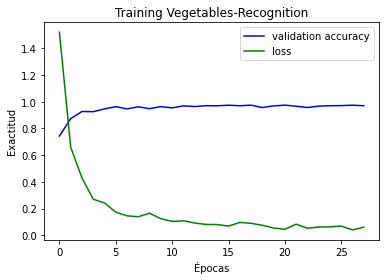

In [11]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')

plt.title('Training Vegetables-Recognition')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")

plt.show()

plt.plot(history.history['val_accuracy'], label='validation accuracy',color = 'Blue')
plt.plot(history.history['loss'], label='loss', color = 'Green')

plt.title('Training Vegetables-Recognition')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")

plt.show()

(250, 250, 3)
El vector de salida obtenido:  [[4.8208955e-07 5.8910397e-09 3.9833522e-11 7.7958218e-16 2.8127335e-14
  9.9999952e-01 1.9386988e-12 3.6444618e-11 3.7322986e-14 4.7211735e-10]]
La etiqueta de salida predicha es  5
Ahora dicho con texto: La etiqueta de salida predicha es  Cucumber


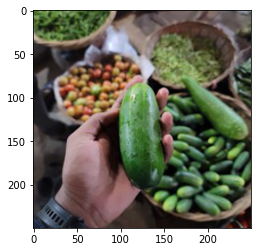

In [12]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Bean', 'Broccoli', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
%matplotlib inline

pil_im = Image.open('/kaggle/input/vegetable-images/Vegetable Images/test/Cucumber/1102.jpg', 'r')
im = np.asarray(pil_im.resize((250, 250)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 250x250x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3

im = im.reshape(1,250,250,3)


print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', np.argmax(model.predict(im)))
print('Ahora dicho con texto: La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])






In [13]:
# PRODUCTION ----------------------------------------------

#from matplotlib.pyplot import imshow
import numpy as np
#from PIL import Image
import tensorflow.keras

# SAVING --------------------------------------------------
#model.save_model("mimodelo.h5")


# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Bean', 'Broccoli', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
%matplotlib inline
aciertos = 0
errores_totales = 0
print("ETIQUETA PREDICHA -> ETIQUETA REAL")
for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    for y_predicha, y_real in zip(np.round(prediccion_minilote,3), etiqueta_real_minilote):
        if np.argmax(y_predicha) == np.argmax(y_real):
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)])
            aciertos += 1
        else:
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)], "✘")
            errores_totales += 1
print(f"\nTotal de errores: {errores_totales} ")
print(f"\nTotal de aciertos: {aciertos} ")

ETIQUETA PREDICHA -> ETIQUETA REAL
Cauliflower -> Cauliflower
Tomato -> Tomato
Pumpkin -> Pumpkin
Broccoli -> Broccoli
Tomato -> Tomato
Pumpkin -> Pumpkin
Potato -> Potato
Radish -> Radish
Capsicum -> Capsicum
Radish -> Radish
Cauliflower -> Cauliflower
Bean -> Bean
Tomato -> Tomato
Carrot -> Carrot
Tomato -> Pumpkin ✘
Potato -> Potato
Carrot -> Carrot
Tomato -> Tomato
Tomato -> Tomato
Carrot -> Carrot
Radish -> Potato ✘
Capsicum -> Capsicum
Tomato -> Tomato
Carrot -> Carrot
Tomato -> Tomato
Carrot -> Carrot
Carrot -> Carrot
Capsicum -> Capsicum
Tomato -> Tomato
Pumpkin -> Pumpkin
Potato -> Potato
Cucumber -> Cucumber
Tomato -> Tomato
Bean -> Bean
Pumpkin -> Pumpkin
Potato -> Potato
Pumpkin -> Pumpkin
Carrot -> Carrot
Radish -> Radish
Radish -> Radish
Bean -> Bean
Broccoli -> Tomato ✘
Capsicum -> Capsicum
Capsicum -> Capsicum
Capsicum -> Capsicum
Tomato -> Tomato
Capsicum -> Capsicum
Potato -> Potato
Pumpkin -> Pumpkin
Capsicum -> Capsicum
Cucumber -> Cucumber
Potato -> Potato
Capsicum